In [53]:
import os, sys

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [54]:
#load the module in  a  new notebook
import sys
sys.path.append('/content/gdrive/My Drive/social-networks-utils-main')


In [55]:
import sys
sys.path.insert(0,'/content/drive/My Drive/social-networks-utils-main')

from metricas import *
from homofilia import *
from modelos import*

#### Comenzamos por hacer un gráfico del grafo utilizando la librería networkx

In [56]:
import pandas as pd

In [57]:
import networkx as nx

In [58]:
df = pd.read_csv('World.csv')
G = nx.from_pandas_edgelist(df, 'Origen', 'Destino')
G = nx.to_undirected(G)


### 1) Determinar: 
### a. El diámetro de la red. 
### b. El grado promedio de la red. 
### c. El coeficiente de clustering promedio de la red. 


### Realizo un gráfico del grafo 

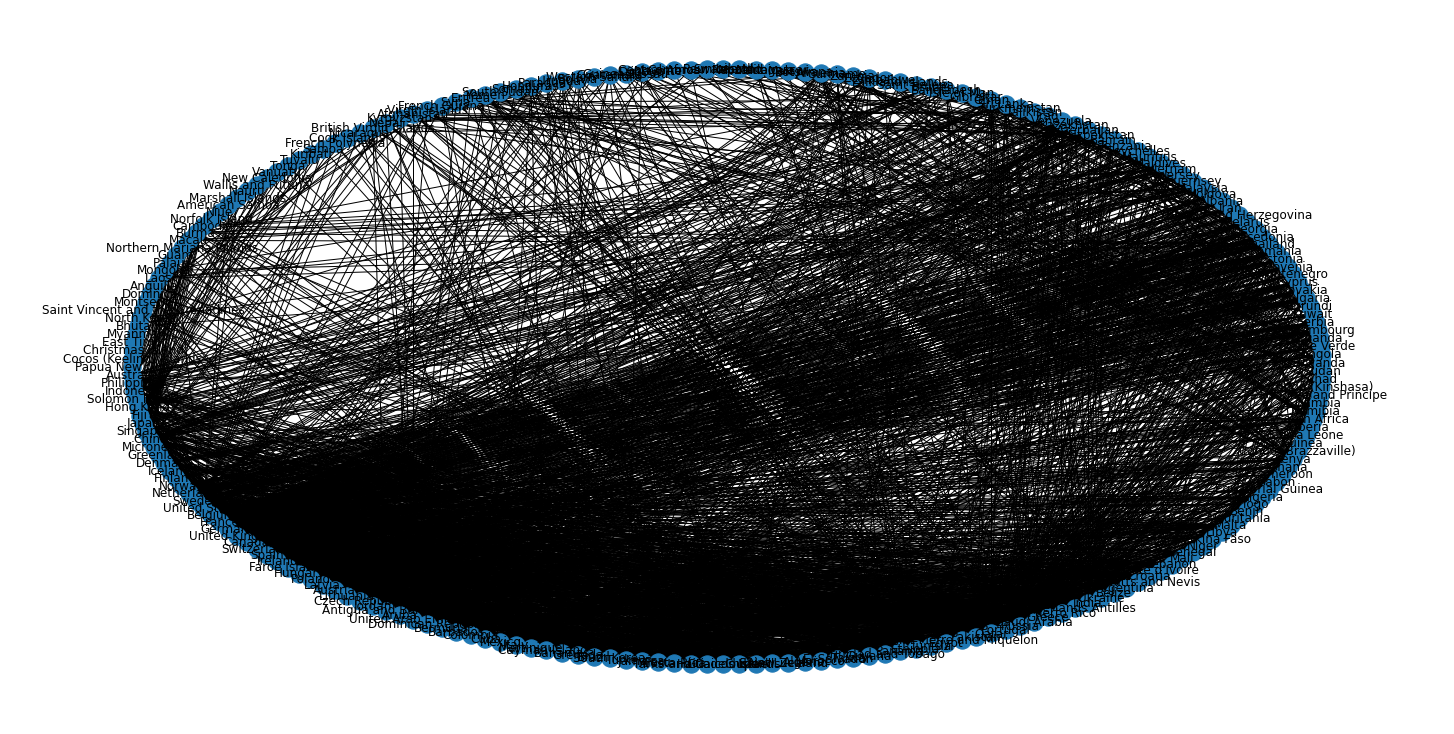

In [59]:
from matplotlib.pyplot import figure
figure(figsize=(20, 10))
nx.draw_shell(G, with_labels=True)

In [ ]:
# El diámetro se puede calcular con la función diameter de Networkx

nx.diameter(G, e=None, usebounds=False)


5

In [ ]:
# El grado promedio se puede calcular con la siguiente función  de Networkx
grado_promedio(G)

24.90829694323144

In [ ]:
# Con la función clustering podemos obtener el valor del coeficiente de clustering promedio de la red, quedandonos con el segundo valor de la tupla que devuelve la función
c = clustering(G)
coeficiente_clustering_promedio = c[1]
coeficiente_clustering_promedio

0.6601565365859736

### 2) Para el análisis de Homofilia por algún tipo, voy a considerar la característica de los hemisferios, específicamente el Occidente y el Oriente, dejando de lado los demás. En especial, el interés particular en éstos se debe a que además de la connotación geográfica, podemos además sumar que entre estos dos existe una diferencia cultural. Tenemos por un lado la cultura Occidental y la cultura de Oriente. 
### Siguiendo con la explicación se tratará a continuación de medir la homofilia de esta característica detallada anteriormente. Tratando de responder la preguntas que sigue.
### ¿Existe una tendencia de los paises a establecer una mayor cantidad conexiones/enlaces entre otros que sean de su mismo hemisferio/cultura? 
###

A continuación realizo un manejo del dataframe creado anteriormente correspondiente a los datos proporcionados para lograr añadir el atributo que se va a estudiar.

In [ ]:
origen = df[['Origen']]
origen.columns = ['pais']
origen

pais
0     Papua New Guinea
1     Papua New Guinea
2     Papua New Guinea
3     Papua New Guinea
4     Papua New Guinea
...                ...
2847         Lithuania
2848           Armenia
2849           Eritrea
2850             Yemen
2851   Solomon Islands

[2852 rows x 1 columns]

In [ ]:
destino = df[['Destino']]
destino.columns = ['pais']
destino

pais
0           Australia
1         Philippines
2           Indonesia
3     Solomon Islands
4           Hong Kong
...               ...
2847          Georgia
2848          Georgia
2849            Yemen
2850         Djibouti
2851            Nauru

[2852 rows x 1 columns]

In [ ]:
paises = origen.merge(destino,  how='outer').drop_duplicates()
paises

pais
0             Papua New Guinea
10                   Greenland
12                     Iceland
33                      Canada
104                    Algeria
...                        ...
48583                 Anguilla
48587               Montserrat
48588              North Korea
48592                  Myanmar
48593  Cocos (Keeling) Islands

[229 rows x 1 columns]

In [ ]:
pip install pycountry-convert


In [ ]:
import pycountry_convert as pc

In [ ]:
def convert(x): 
  
    #convert country name to country code
    try:   
        cn_code = pc.country_name_to_country_alpha2(x, cn_name_format = "default")
    except:
        return "Unk"
    #convert cn_code to continent code
    try:
        
        conti_code = pc.country_alpha2_to_continent_code(cn_code)
    except:
        return "Unk"
    return conti_code

In [ ]:
paises['continente'] = paises['pais'].map(lambda x: convert(x))
paises

pais continente
0             Papua New Guinea         OC
10                   Greenland         NA
12                     Iceland         EU
33                      Canada         NA
104                    Algeria         AF
...                        ...        ...
48583                 Anguilla         NA
48587               Montserrat         NA
48588              North Korea         AS
48592                  Myanmar         AS
48593  Cocos (Keeling) Islands         AS

[229 rows x 2 columns]

In [ ]:
# Determino diccionario de continente
cont_hemis = {'OC': 'Oriental',
              'NA': 'Occidental',
              'EU': 'Oriental',
              'AF': 'Occidental',
              'SA': 'Occidental',
              'AS': 'Oriental',
              'Unk': 'Unk'}
cont_hemis

{'AF': 'Occidental',
 'AS': 'Oriental',
 'EU': 'Oriental',
 'NA': 'Occidental',
 'OC': 'Oriental',
 'SA': 'Occidental',
 'Unk': 'Unk'}

In [ ]:
paises['p_c'] = (paises['pais'] + paises['continente'].map(lambda x: '_{}'.format(x))).map(lambda x: tuple(x.split('_')))
paises

pais continente                            p_c
0             Papua New Guinea         OC         (Papua New Guinea, OC)
10                   Greenland         NA                (Greenland, NA)
12                     Iceland         EU                  (Iceland, EU)
33                      Canada         NA                   (Canada, NA)
104                    Algeria         AF                  (Algeria, AF)
...                        ...        ...                            ...
48583                 Anguilla         NA                 (Anguilla, NA)
48587               Montserrat         NA               (Montserrat, NA)
48588              North Korea         AS              (North Korea, AS)
48592                  Myanmar         AS                  (Myanmar, AS)
48593  Cocos (Keeling) Islands         AS  (Cocos (Keeling) Islands, AS)

[229 rows x 3 columns]

In [ ]:
def to_hemis(x): 
  if (x[0] == 'Iceland' or x[0] == 'Portugal' or x[0] == 'Spain' or x[0] == 'United Kingdom' or x[0] == 'Irlanda' ):
    return 'Occidental'
  else:
    return cont_hemis[x[1]]

In [ ]:
paises['hemisferio'] = paises['p_c'].map(lambda x: to_hemis(x))
paises

pais continente                            p_c  \
0             Papua New Guinea         OC         (Papua New Guinea, OC)   
10                   Greenland         NA                (Greenland, NA)   
12                     Iceland         EU                  (Iceland, EU)   
33                      Canada         NA                   (Canada, NA)   
104                    Algeria         AF                  (Algeria, AF)   
...                        ...        ...                            ...   
48583                 Anguilla         NA                 (Anguilla, NA)   
48587               Montserrat         NA               (Montserrat, NA)   
48588              North Korea         AS              (North Korea, AS)   
48592                  Myanmar         AS                  (Myanmar, AS)   
48593  Cocos (Keeling) Islands         AS  (Cocos (Keeling) Islands, AS)   

       hemisferio  
0        Oriental  
10     Occidental  
12     Occidental  
33     Occidental  
104    Occidental  
...           ...  
48583  Occidental  
48587  Occidental  
48588    Oriental  
48592    Oriental  
48593    Oriental  

[229 rows x 4 columns]

In [ ]:
paises_hemisferios = paises[['pais', 'hemisferio']].set_index('pais').to_dict()['hemisferio']
paises_hemisferios

{'Afghanistan': 'Oriental',
 'Albania': 'Oriental',
 'Algeria': 'Occidental',
 'American Samoa': 'Oriental',
 'Angola': 'Occidental',
 'Anguilla': 'Occidental',
 'Antigua and Barbuda': 'Occidental',
 'Argentina': 'Occidental',
 'Armenia': 'Oriental',
 'Aruba': 'Occidental',
 'Australia': 'Oriental',
 'Austria': 'Oriental',
 'Azerbaijan': 'Oriental',
 'Bahamas': 'Occidental',
 'Bahrain': 'Oriental',
 'Bangladesh': 'Oriental',
 'Barbados': 'Occidental',
 'Belarus': 'Oriental',
 'Belgium': 'Oriental',
 'Belize': 'Occidental',
 'Benin': 'Occidental',
 'Bermuda': 'Occidental',
 'Bhutan': 'Oriental',
 'Bolivia': 'Occidental',
 'Bosnia and Herzegovina': 'Oriental',
 'Botswana': 'Occidental',
 'Brazil': 'Occidental',
 'British Virgin Islands': 'Occidental',
 'Brunei': 'Oriental',
 'Bulgaria': 'Oriental',
 'Burkina Faso': 'Occidental',
 'Burma': 'Unk',
 'Burundi': 'Occidental',
 'Cambodia': 'Oriental',
 'Cameroon': 'Occidental',
 'Canada': 'Occidental',
 'Cape Verde': 'Occidental',
 'Cayman Isl

In [ ]:
def mapper(x):
  return paises_hemisferios[x]

In [ ]:
props = proporcion_por_tipo(G, mapper)
props

{'Occidental': 0.4585152838427948,
 'Oriental': 0.4978165938864629,
 'Unk': 0.043668122270742356}

In [ ]:
# Proporción de tipo Occidental con respecto a la cantidad de nodos totales
p  = props['Occidental']
# Proporción de tipo Oriental con respecto a la cantidad de nodos totales
q = props['Oriental']


In [ ]:
# Probabilidad de encontrar un extremo Occidental y otro Oriental
# Calculamos el ideal sin homofilia 
2*p*q

0.4565130336950096

In [ ]:
### Proporcion cruzan campos
proporcion_cruzan_campo(G, mapper)

0.27419354838709675

In [ ]:
### Proporcion que cursan campo de tipo Occidental
proporcion_cruzan_campo_de_tipo(G, 'Occidental', mapper)

0.3593073593073593

In [ ]:
### Proporción que cruzan campo de tipo Oriental
proporcion_cruzan_campo_de_tipo(G, 'Oriental', mapper)

0.2

In [ ]:
# Proporción de no homofilia 
proporcion_cruzan_campo(G, mapper)/(2*p*q)

0.600625892688711

### Conclusiones:
#### Si la fracción de aristas que cruzan géneros es significativamente menor (o mayor) a 2*q*p, entonces hay evidencia de Homofilia.
#### Para la característica propuesta se obtuvo que tenemos una proporción de cruces de campos mucho menor al valor 2*p*q. Esto significa una evidencia que soporta la hipótesis de homofilia expuesta. 
#### Es decir que se evidencia homofilia tanta para un lado (occidental) como para el otro (oriental).
#### Esto nos demuestra que existe evidencia para soportar nuestra hipótesis: Los países occidentales tienden a viajar más hacia países occidentales. Asi como los paises orientales tienden a hacerlo a los países orientales. 
### Por último, se obtuvo un porcentaje de "sin-homofilia" de 0.060. 


### 3) Determinar los puentes (globales o locales) en dicha red. 



In [ ]:
# Los puentes globales de la red pueden calcularse facilmente con la función bridges de Networkx.
# A continuación una lista de los puentes globales
list(nx.bridges(G))


[('Fiji', 'Tuvalu'),
 ('United States', 'American Samoa'),
 ('United Kingdom', 'Saint Helena'),
 ('Canada', 'Saint Pierre and Miquelon'),
 ('Antigua and Barbuda', 'Montserrat'),
 ('New Zealand', 'Niue'),
 ('South Africa', 'Lesotho'),
 ('South Africa', 'Swaziland'),
 ('Burma', 'Myanmar')]

In [ ]:
# Los puentes locales de la red pueden calcularse facilmente con la función local_bridges de Networkx.
# A continuación una lista de los puentes locales
list(nx.local_bridges(G))

[('Papua New Guinea', 'Micronesia', 3),
 ('Fiji', 'Tuvalu', inf),
 ('Micronesia', 'Marshall Islands', 3),
 ('United States', 'American Samoa', inf),
 ('United Kingdom', 'Saint Helena', inf),
 ('Canada', 'Saint Pierre and Miquelon', inf),
 ('Antigua and Barbuda', 'Montserrat', inf),
 ('New Zealand', 'Niue', inf),
 ('South Africa', 'Lesotho', inf),
 ('South Africa', 'Swaziland', inf),
 ('Burma', 'Myanmar', inf)]

### 4) a. Determinar un tipo de centralidad que podría ser útil calcular para esta red, justificando.
  ###  b. Realizar una representación gráfica de dicha red, considerando la centralidad de los distintos países dada por la métrica del punto a (tamaño de los nodos proporcional a dicha métrica). 


### Elección de la centralidad

### Centralidad por Grado: 
#### Un tipo de centralidad interesante para considerar y la que voy a elegir es la Centralidad por Grado. En esta centralidad los nodos con más conexiones (leáse con mayor cantidad de aristas) son más influyentes e importantes en la red. Particularmente, en la red que se viene trabajando estamos considerandos países y destinos. Es muy intuitivo entonces pensar que si en cierto país (nodo) hay un número elevado de aristas pues entonces dicho país es de relevancia en la red, hay un interés para visitarlo. La razón de esta distinción, no se puede asegurar, podríamos conjeturar que se puede deber a razones de turismo, trabajo, atracciones, etc.


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# for Notebook
%matplotlib inline

In [62]:
def draw(G, pos, measures, measure_name):
    figure(figsize=(50, 20), dpi=300)
    #250
    values = list(measures.values())
    x = list(map(lambda x: x*1000,values))
    nodes = nx.draw_networkx_nodes(G, pos, node_size=x, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    labels = nx.draw_networkx_labels(G, pos)
    #edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
   
   
    plt.show()

In [63]:
pos = nx.spring_layout(G, seed=675)

### En el siguiente gráfico se grafica como queda la representación de los países más centrales. Observese que los países con mayor centralidad tienen un tamaño de nodo más grande que el resto.
### A su vez también se tiene el criterio de colores, donde el amarillo simboliza la mayor centralidad y el color violeta los menos centrales. 
### Aclaración: se habla de mayor o menor centralidad en relación a la centralidad elegida: Centralidad de grado.

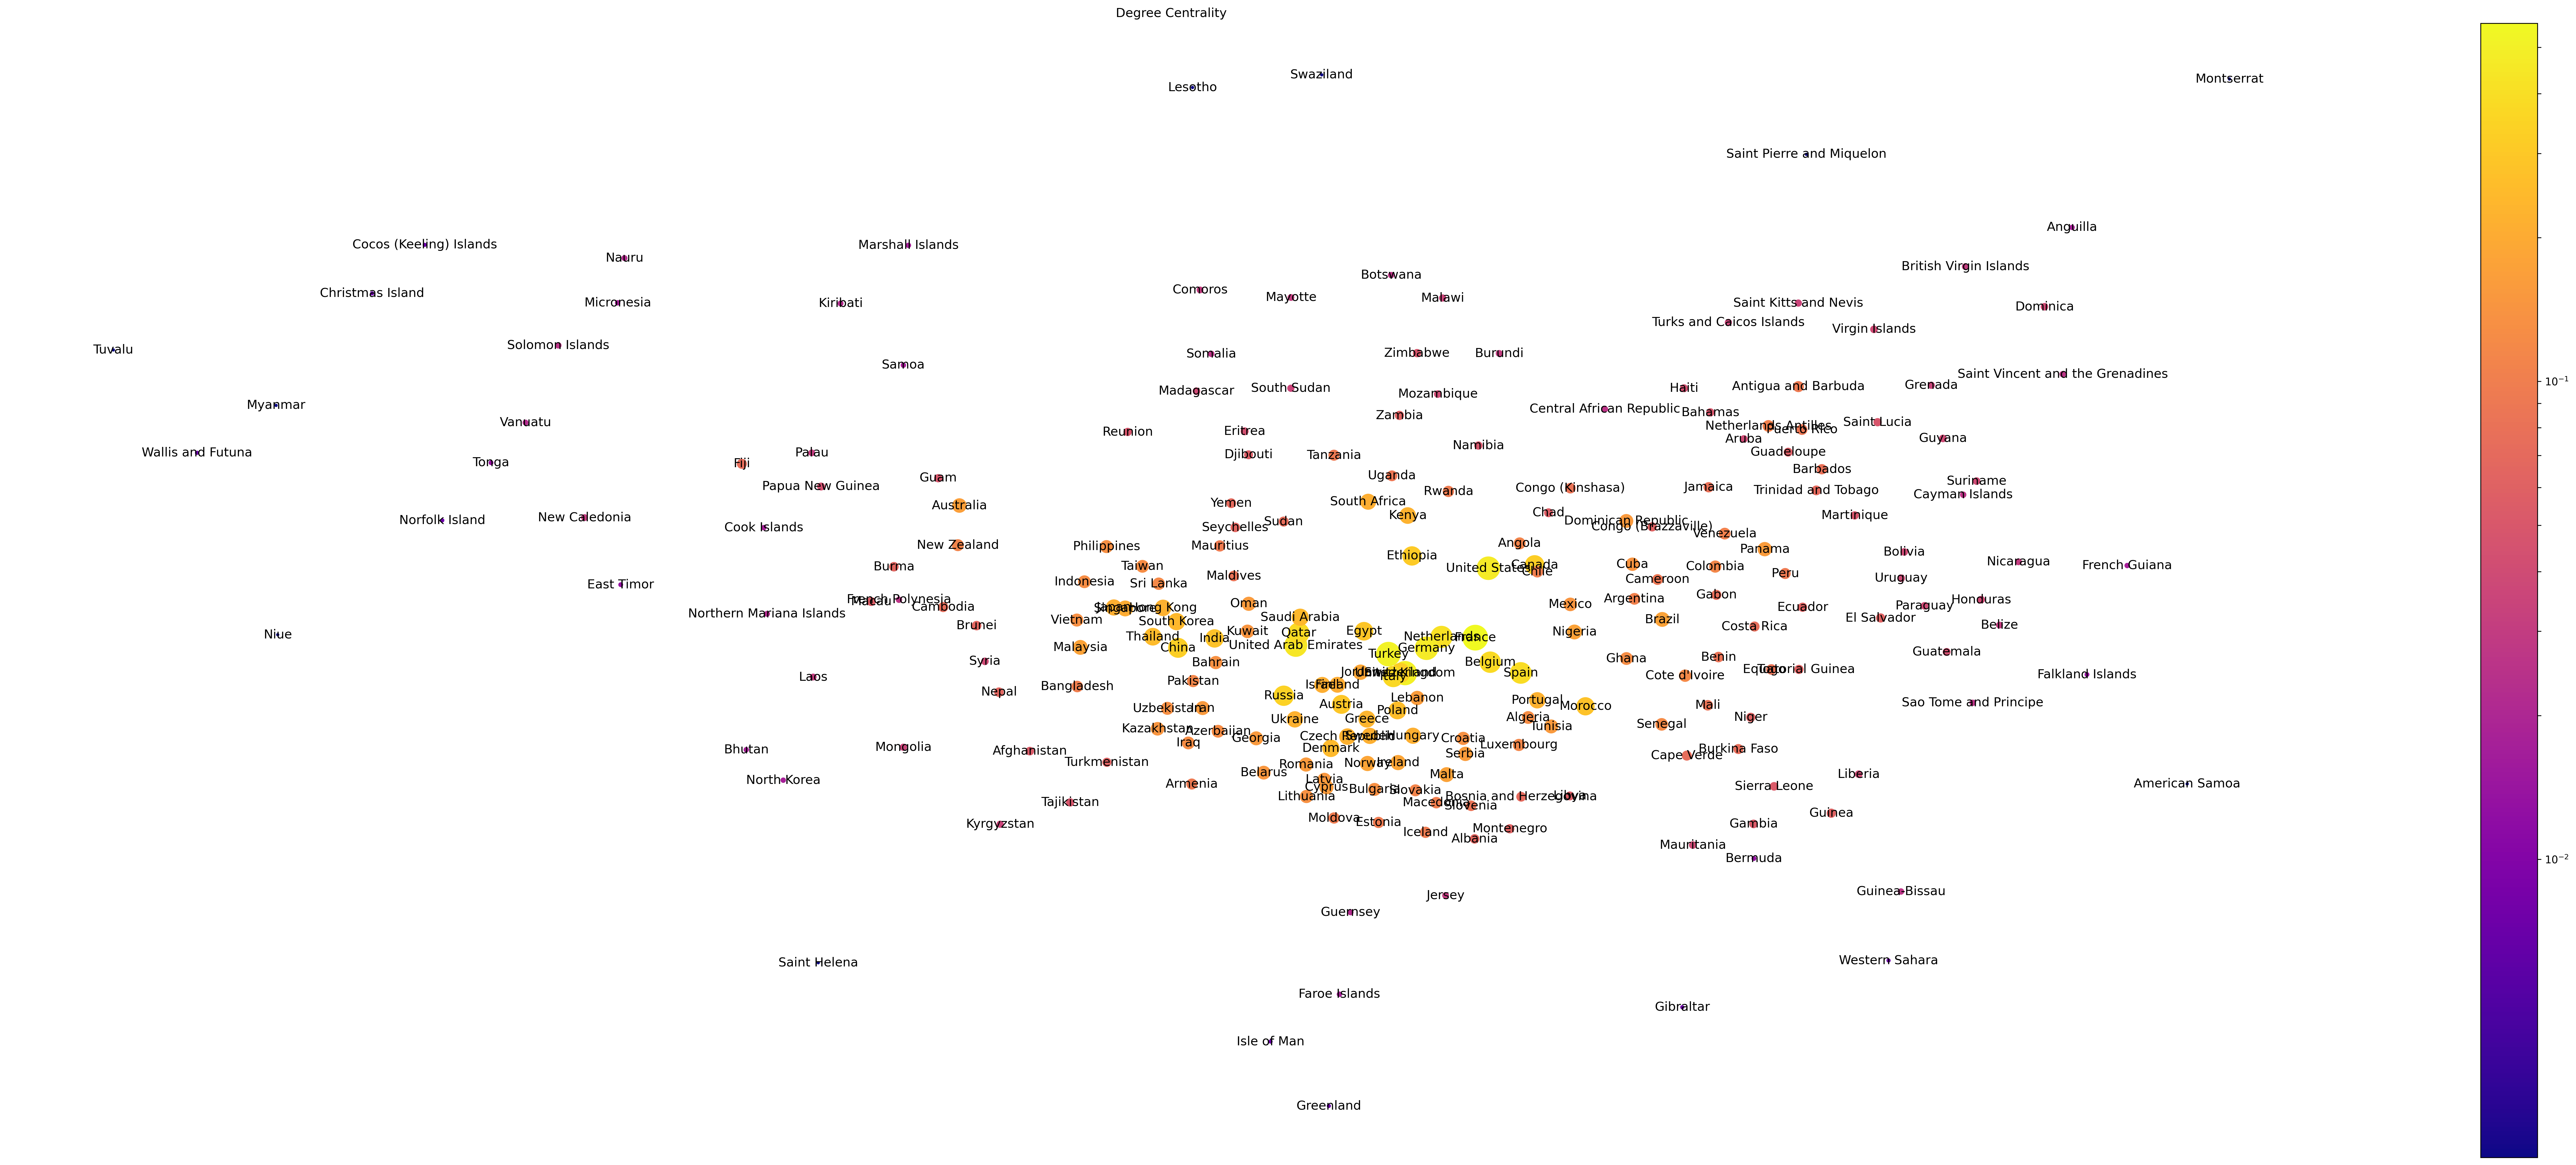

In [64]:
draw(G, pos, nx.degree_centrality(G), 'Degree Centrality')


### Aquí se puede observar una lista ordenada con los países de mayor a menor centralidad según la centralidad de grado.

In [65]:
central = nx.degree_centrality(G)

sorted(central.items(), key=lambda item: -item[1])

[('France', 0.5614035087719298),
 ('Turkey', 0.5087719298245614),
 ('United Kingdom', 0.4956140350877193),
 ('United States', 0.4649122807017544),
 ('Germany', 0.4649122807017544),
 ('United Arab Emirates', 0.44298245614035087),
 ('Netherlands', 0.40789473684210525),
 ('Spain', 0.39035087719298245),
 ('Belgium', 0.381578947368421),
 ('Qatar', 0.381578947368421),
 ('Italy', 0.37280701754385964),
 ('Russia', 0.3421052631578947),
 ('China', 0.3289473684210526),
 ('Switzerland', 0.32456140350877194),
 ('Canada', 0.3157894736842105),
 ('Ethiopia', 0.3070175438596491),
 ('Austria', 0.293859649122807),
 ('Egypt', 0.2850877192982456),
 ('India', 0.2763157894736842),
 ('Morocco', 0.27192982456140347),
 ('Poland', 0.2587719298245614),
 ('Thailand', 0.2543859649122807),
 ('Denmark', 0.24561403508771928),
 ('South Korea', 0.24122807017543857),
 ('Saudi Arabia', 0.24122807017543857),
 ('Greece', 0.2324561403508772),
 ('Kenya', 0.22368421052631576),
 ('Hong Kong', 0.21929824561403508),
 ('Czech Repu

### 5. a) Obtener una simulación de un modelado de Erdös-Rényi que corresponda a los parámetros de esta red. 

Alfa:  2.7


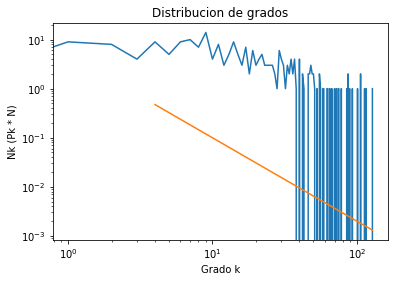

In [66]:
# Utilizo la función graficar_distribuciones para obtener el alfa
graficar_distribuciones((distribucion_grados(G)))
# Con esto decimos que alfa: 2.7

In [67]:
e_r = erdos_renyi(cant = len(G.nodes),k = grado_promedio(G))


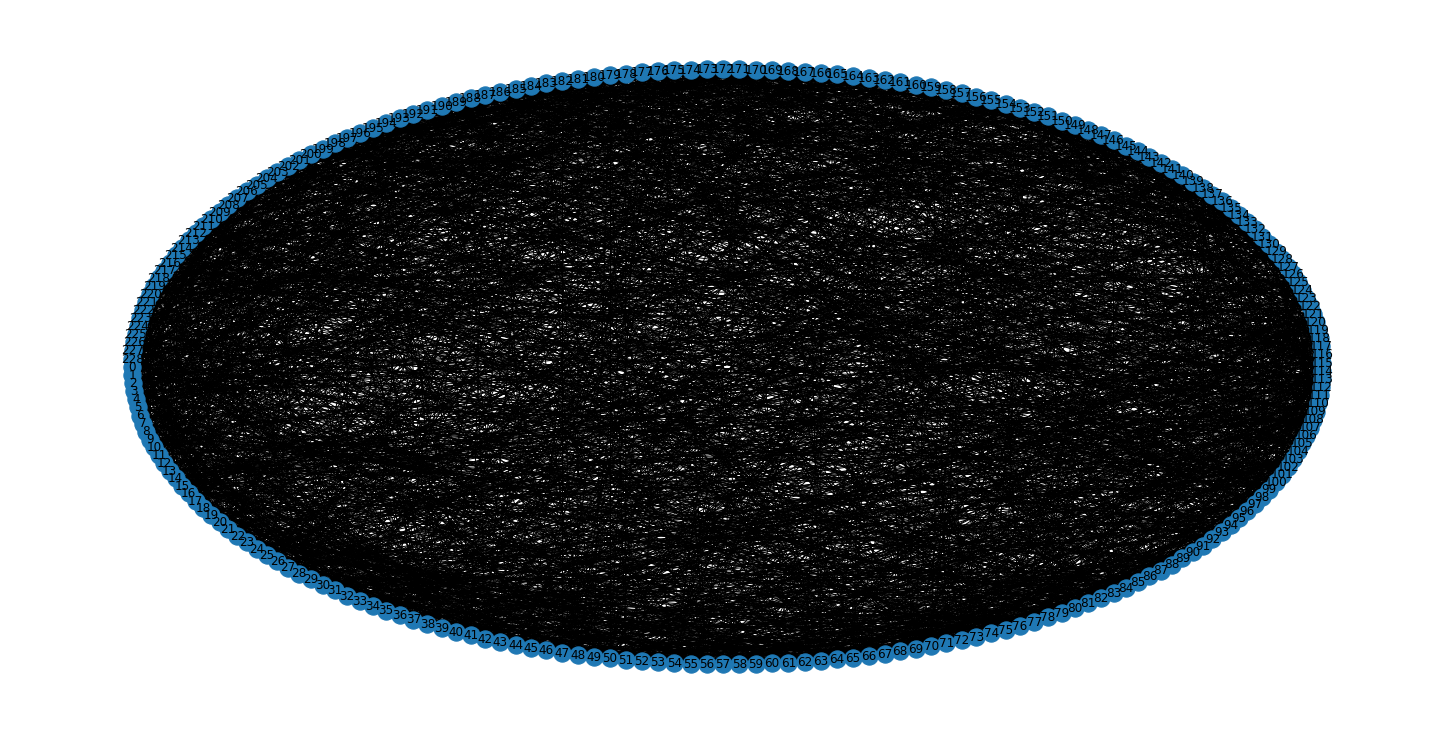

In [68]:
# Grafico el grafo obtenido
figure(figsize=(20, 10))
nx.draw_shell(e_r, with_labels=True)

#### Análisis de la simulación

Alfa:  2.7


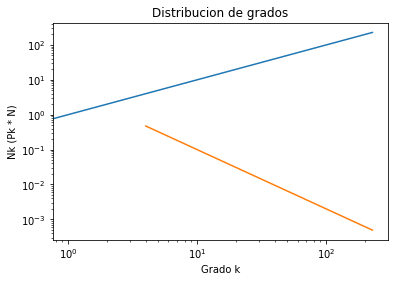

In [69]:
#Analisis
graficar_distribuciones(e_r)

A mayor grado de nodo mayor cantidad de nodos que tienen dicho grado. Es proporcional la cantidad de nodos que tienen un grado y el grado mismo.


In [70]:
# Diametro
# El diámetro se puede calcular con la función diameter de Networkx

nx.diameter(e_r, e=None, usebounds=False)


3

Las redes reales suelen tener un diámetro pequeño. Este valor es representativo de una red real

In [71]:
# El grado promedio se puede calcular con la siguiente función  de Networkx
grado_promedio(e_r)

25.004366812227076

Similar al grafo original que estuvimos analizando. Es decir que tiene sentido para una red real.

In [72]:
# Con la función clustering podemos obtener el valor del coeficiente de clustering promedio de la red, quedandonos con el segundo valor de la tupla que devuelve la función
c = clustering(e_r)
coeficiente_clustering_promedio = c[1]
coeficiente_clustering_promedio

0.11045181508840052

Los coeficientes de clustering de Erdös-Rényi suelen ser muy pequeños, este valor es esperable.

### 5. b) Obtener una simulación de un modelado de Preferential Attachment (ley de potencias) que corresponda a los parámetros de esta red. 


In [73]:
p_a = preferential_attachment(dirigido = False,alfa = 2.7  , cant = len(G.nodes), k = grado_promedio(G))

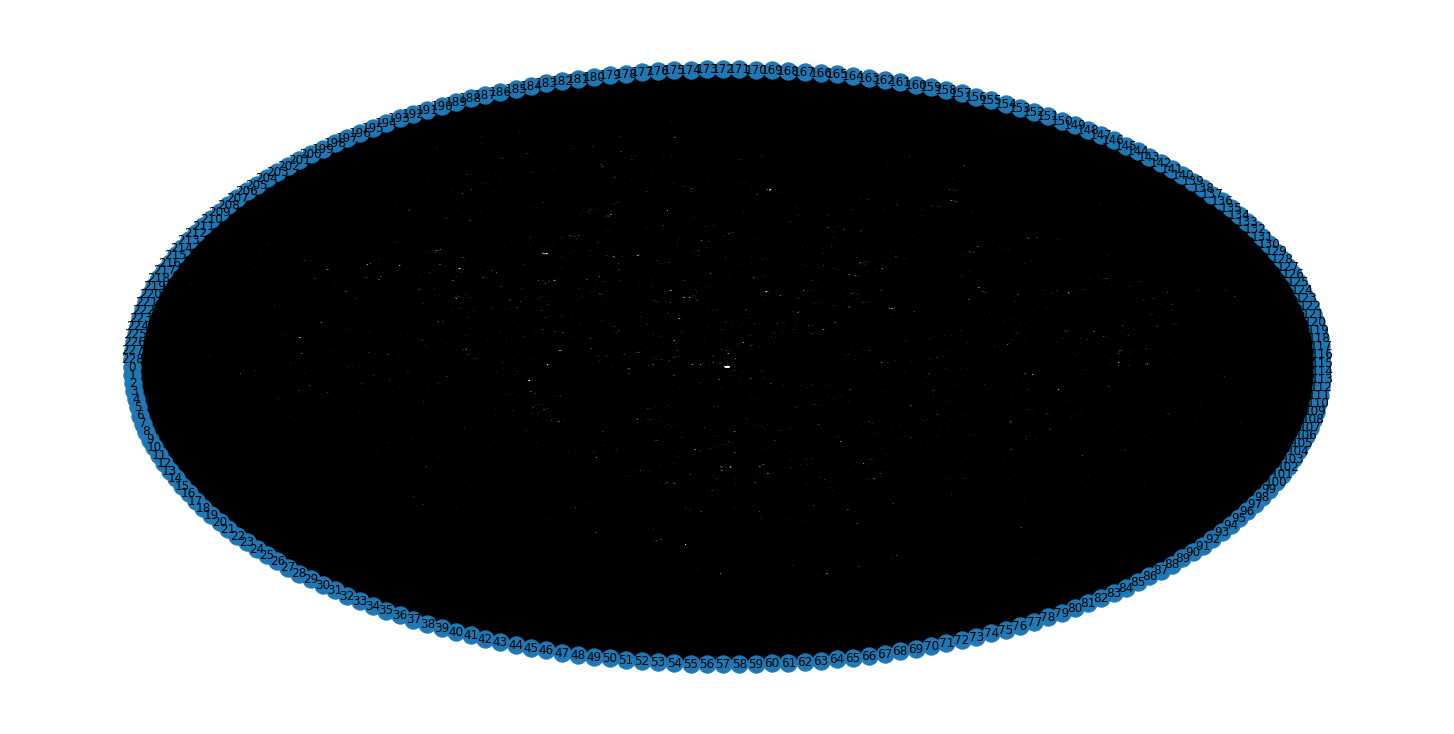

In [74]:
figure(figsize=(20, 10))
nx.draw_shell(p_a, with_labels=True)

Alfa:  2.7


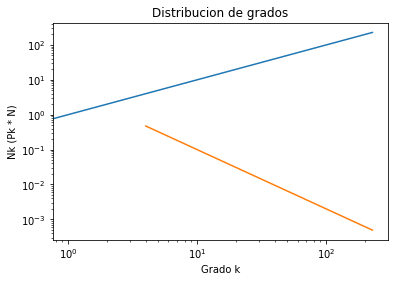

In [75]:
#Analisis
graficar_distribuciones(p_a)

Mismo caso que el anterior, a mayor grado, mayor cantidad de nodos tienen ese grado.

In [76]:
# Diametro
# El diámetro se puede calcular con la función diameter de Networkx

nx.diameter(p_a, e=None, usebounds=False)


2

Las redes reales suelen tener un diámetro pequeño. Este valor es representativo de una red real

In [77]:
# El grado promedio se puede calcular con la siguiente función  de Networkx
grado_promedio(p_a)

59.06550218340611

No es representativo de una red real, es un valor extremadamente grande. Considerando que en nuestra real el grado promedio nos dio cerca de 24.

In [78]:
# Con la función clustering podemos obtener el valor del coeficiente de clustering promedio de la red, quedandonos con el segundo valor de la tupla que devuelve la función
c = clustering(p_a)
coeficiente_clustering_promedio = c[1]
coeficiente_clustering_promedio

0.2622961231675504

Es un poco menor que el anterior pero sigue siendo bajo en comparación con el que da el de la red real analizada (0.66). 

In [92]:
#Utilizo el siguiente código para generar un pdf con la resolucion.

!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Parcial1- TDA2.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.





[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Parcial1- TDA2.ipynb to pdf
[NbConvertApp] Support files will be in Parcial1- TDA2_files/
[NbConvertApp] Making directory ./Parcial1- TDA2_files
[NbConvertApp] Making directory ./Parcial1- TDA2_files
[NbConvertApp] Making directory ./Parcial1- TDA2_files
[NbConvertApp] Making directory ./Parcial1- TDA2_files
[NbConvertApp] Making directory ./Parcial1- TDA2_files
[NbConvertApp] Making directory ./Parcial1- TDA2_files
[NbConvertApp] Making directory ./Parcial1- TDA2_files
[NbConvertApp] Writing 87967 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 2866609 bytes to /

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'